In [3]:
#Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
%matplotlib inline
import seaborn as sns
import scipy.stats as st
import warnings
import statsmodels.api as sm
warnings.filterwarnings('ignore')
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from plotly.offline import plot, iplot, init_notebook_mode

# Initialize Plotly in offline mode
init_notebook_mode(connected=True)

In [9]:
#Read the analytics csv file and store our dataset into a dataframe called "df"
df = pd.read_csv('Employee_Performance.csv')

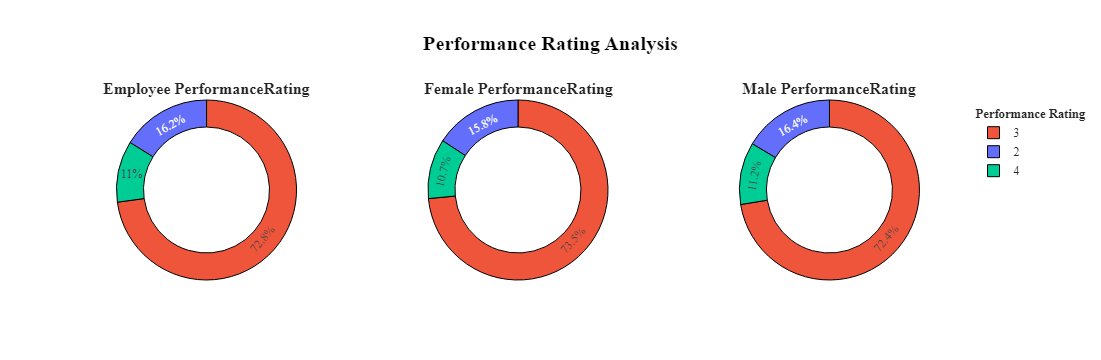

In [11]:
#Percentage Overview of Attrition
att1 = df.groupby('PerformanceRating', as_index=False)['Age'].count()
att1['Count'] = att1['Age']
att1.drop('Age', axis=1, inplace=True)

att2 = df.groupby(['Gender', 'PerformanceRating'], as_index=False)['Age'].count()
att2['Count'] = att2['Age']
att2.drop('Age', axis=1, inplace=True)

colors = ['#636EFA', '#EF553B', '#00CC96', '#AB63FA', '#FFA15A']

fig = make_subplots(rows=1, cols=3, specs=[[{"type": "pie"}, {"type": "pie"}, {"type": "pie"}]],
                    subplot_titles=('<b>Employee PerformanceRating</b>', '<b>Female PerformanceRating</b>', '<b>Male PerformanceRating</b>'))

fig.add_trace(go.Pie(values=att1['Count'], labels=att1['PerformanceRating'], hole=0.7,
                     marker_colors=colors, name='Employee PerformanceRating', showlegend=False), row=1, col=1)

fig.add_trace(go.Pie(values=att2[att2['Gender'] == 'Female']['Count'], labels=att2[att2['Gender'] == 'Female']['PerformanceRating'], hole=0.7,
                     marker_colors=colors, name='Female PerformanceRating', showlegend=False), row=1, col=2)

fig.add_trace(go.Pie(values=att2[att2['Gender'] == 'Male']['Count'], labels=att2[att2['Gender'] == 'Male']['PerformanceRating'], hole=0.7,
                     marker_colors=colors, name='Male PerformanceRating', showlegend=True), row=1, col=3)

fig.update_layout(title_x=0.5, template='simple_white', showlegend=True,
                  legend_title_text="<b style=\"font-size:90%;\">Performance Rating</b>",
                  title_text='<b style="color:black; font-size:120%;">Performance Rating Analysis</b>',
                  font_family="Times New Roman", title_font_family="Times New Roman")

fig.update_traces(marker=dict(line=dict(color='#000000', width=1)))

fig.show()